In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('plots/paper.mplstyle')

import seaborn as sns

from scipy.optimize import curve_fit
def powerlaw(x,a,b):
    return a*x**b

In [2]:
res = pd.read_csv("results/2022_05_all_runs.csv")

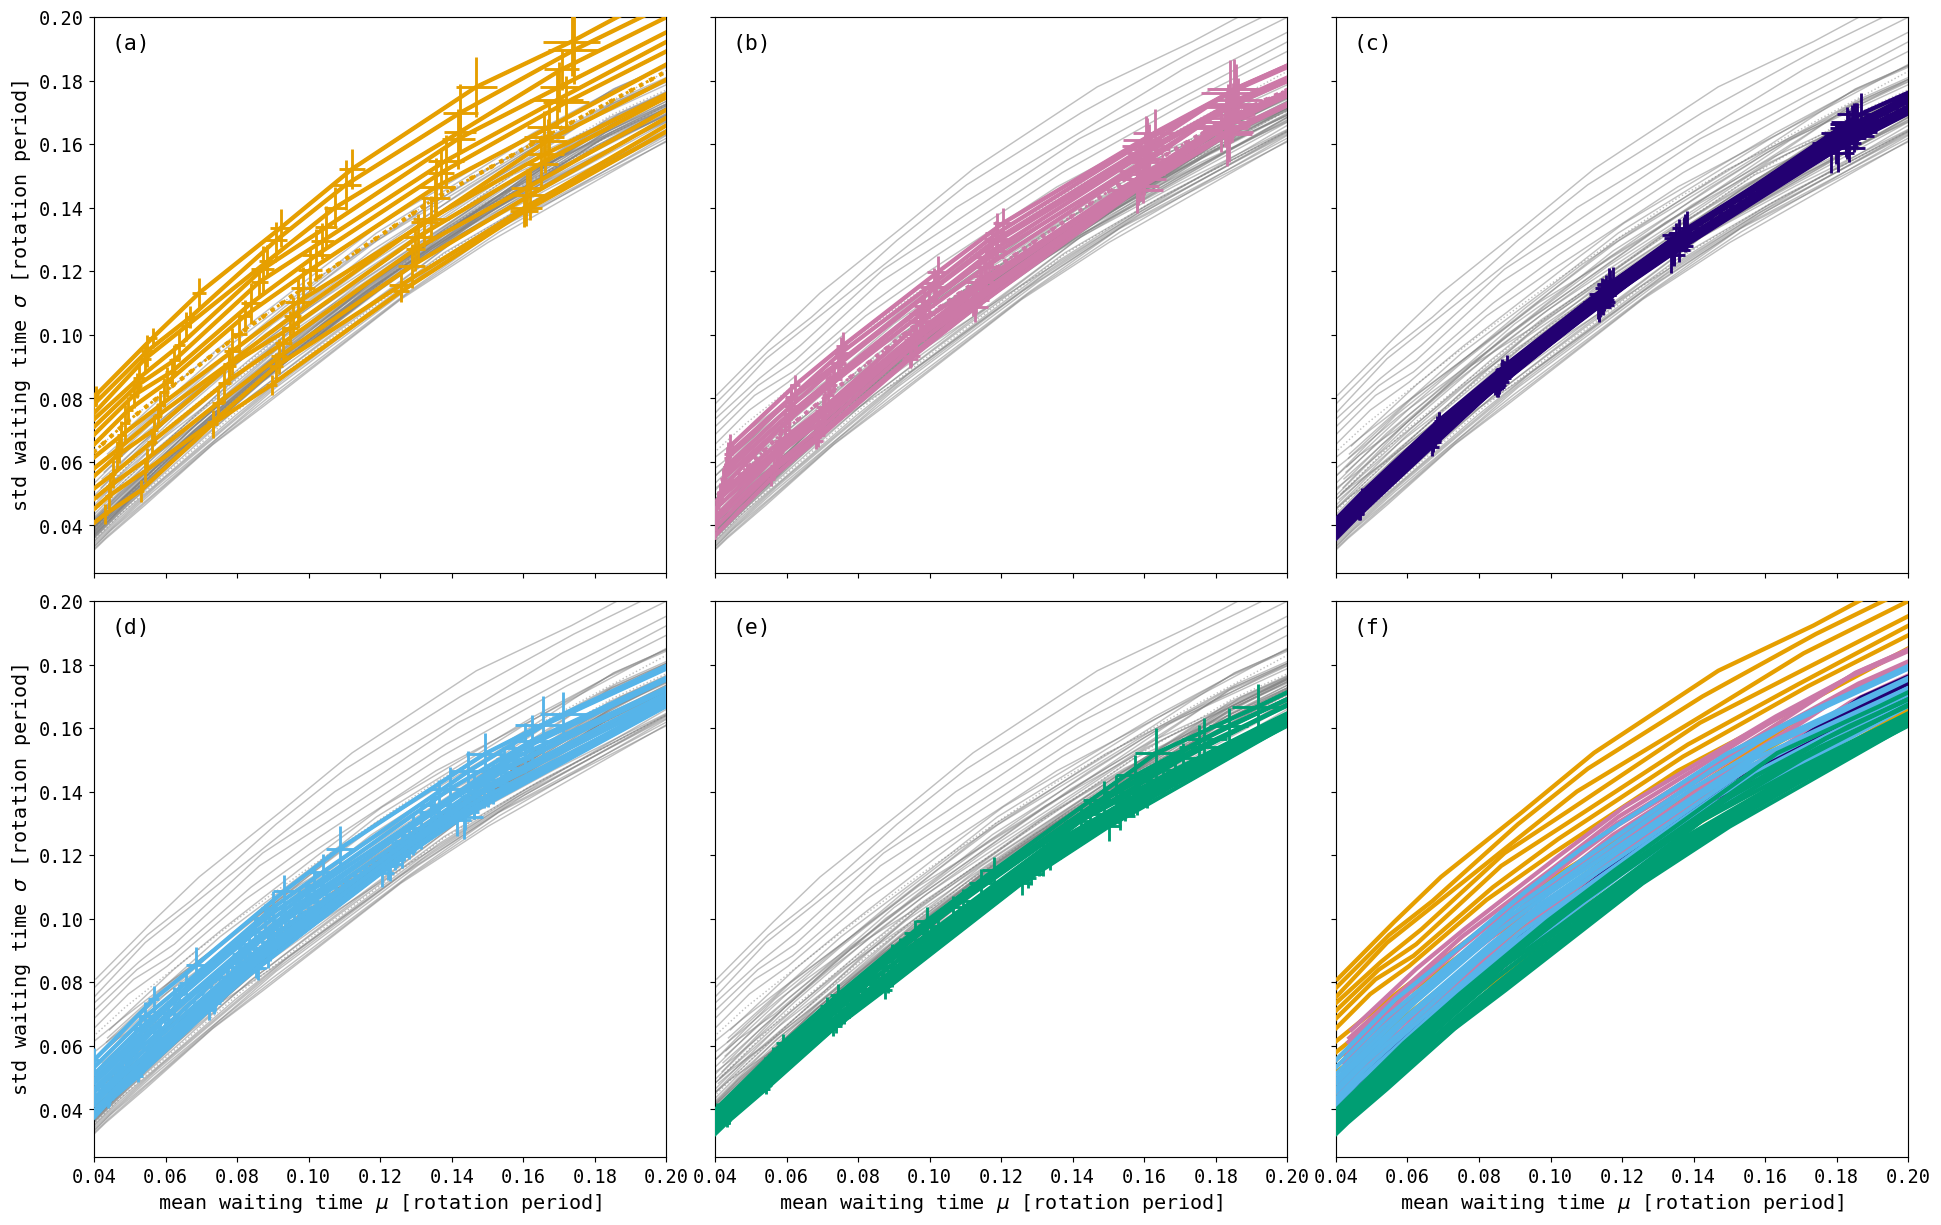

In [3]:
with open("results/2022_05_all_mean_stds.csv","w") as f: 
    string = (f"tstamp,nspots,hem,nflares,c,latitude,mean_of_wtd_means,"
              "mean_of_wtd_stds,std_of_wtd_means,std__of_wtd_stds\n")
    f.write(string)


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,12),sharex=True, sharey=True)
Ns = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,]
axs = [ap for a in axs for ap in a]
nonlat = {}
for (l, g), ax in  list(zip(res.groupby(["hem","nspots","color"]), axs[:-1])):
    hem, nspots, color = l
    latlinesmean, latlinesstd = {}, {}
    std_latlinesmean, std_latlinesstd = {}, {}
    linestyle = ["solid","dashed","dotted","dashdot",':',"solid","dashed","dotted","dashdot",':']
    for N in Ns:
        latlinesmean[N] = []
        latlinesstd[N] =  []
        std_latlinesmean[N] = []
        std_latlinesstd[N] =  []

    for i,(tstamp, nspots, hem, nflares, c) in g.iterrows():
        label = f"{nspots}, {hem}, {nflares}"
        df = pd.read_csv(f"results/{tstamp}_flares_train_merged.csv")

        newcol = "mean waiting time"
        _ = df[(df.midlat2 > 1.) & (df.midlat2 < 89.) & (~df["diff_tstart_std_stepsize1"].isnull())]


        _[newcol] = _["diff_tstart_mean_stepsize1"]

        _ = _.sort_values(by="midlat2",ascending=True)
        z = _.midlat2.values
        x = _[newcol]/2/np.pi
        y = _["diff_tstart_std_stepsize1"]/2./np.pi

        for N in Ns:
            idx = ((z>(N-3)) & (z<(N+3)))
    #         print(idx)
    #         print(idx, x[idx], latlinesmean[N])
            latlinesmean[N].append(x[idx].mean())
            latlinesstd[N].append(y[idx].mean())
            std_latlinesmean[N].append(x[idx].std())
            std_latlinesstd[N].append(y[idx].std())
            with open("results/2022_05_all_mean_stds.csv","a") as f:
                string = (f"{tstamp},{nspots},{hem},{nflares},{c},{N},"
                          f"{x[idx].mean()},{y[idx].mean()},{x[idx].std()},{y[idx].std()}\n")
                f.write(string)
#                 print(string)
#         sns.kdeplot(x=x, y=y,label=label,color=c, alpha=1, levels=4)
#         nonlat[tstamp] = print_no_lat(tstamp, ax)
#         sc = ax.scatter(x,y,s=30, c=z, cmap='viridis',alpha=.65,marker="o",)

    for N in Ns:

        
        if N == 85:
            for a in [ax,axs[-1]]:
                if a == ax:
                    if "1 spot" in label:
                        l = fr"$\theta={N:2d}^\circ$, 1 spot"
                    else:
                        _ = label.split("hem")[0] + "hem."
                        l = fr"$\theta={N:2d}^\circ$, {_}"
                
                else:
                    l = None
                a.plot(latlinesmean[N],latlinesstd[N],
                      
                    linestyle="dashed", alpha=1,
                linewidth=3, c=color,zorder=40,label=l)
            ax.errorbar(latlinesmean[N],latlinesstd[N],
                        xerr=std_latlinesmean[N], yerr=std_latlinesstd[N],
                    linestyle="dashed", alpha=1,
                linewidth=2, c=color,zorder=40,)
            for a in axs[:-1]:
                a.plot(latlinesmean[N],latlinesstd[N],linestyle="dashed", alpha=0.5,
                linewidth=2, c="grey")
            
        elif N==45:
            if "1 spot" in label:
                l = fr"$\theta={N:2d}^\circ$, 1 spot"
            else:
                _ = label.split("hem")[0] + "hem."
                l = fr"$\theta={N:2d}^\circ$, {_}"
        
            ax.plot(latlinesmean[N],latlinesstd[N],
                        
                        alpha=1,linestyle="dotted",linewidth=3,
                 c=color,zorder=40,label=l)
            ax.errorbar(latlinesmean[N],latlinesstd[N],
                        xerr=std_latlinesmean[N], yerr=std_latlinesstd[N],
                        alpha=1,linestyle="dotted",linewidth=2,
                 c=color,zorder=40,)
            for a in axs[:-1]:
                a.plot(latlinesmean[N],latlinesstd[N],linestyle="dotted", alpha=0.5,
                linewidth=1, c="grey")

        else:
            for a in [ax,axs[-1]]:
                if a == ax:
                    if "1 spot" in label:
                        l = fr"$\theta={N:2d}^\circ$, 1 spot"
                    else:
                        _ = label.split("hem")[0] + "hem."
                        l = fr"$\theta={N:2d}^\circ$, {_}"
                else:
                    l =  label.split("hem")[0] + "hem."
                a.plot(latlinesmean[N],latlinesstd[N],
                       linestyle="solid", alpha=1,
                       linewidth=3, c=color,zorder=40,
                       label=l)
            ax.errorbar(latlinesmean[N],latlinesstd[N],
                        xerr=std_latlinesmean[N], yerr=std_latlinesstd[N],
                                linestyle="solid", alpha=1,
                linewidth=2, c=color,zorder=40)
            for a in axs[:-1]:
                a.plot(latlinesmean[N],latlinesstd[N],linestyle="solid", alpha=.5,
                linewidth=1, c="grey")
#     ax.legend(loc=4,fontsize=14, frameon=False);
    ax.set_xlim(0.04,.2)
    ax.set_ylim(0.025,0.2)
    
# last subplot    
# axs[-1].legend(frameon=False)

# add axes labels
for i in [0,3]: 
    axs[i].set_ylabel(r"std waiting time $\sigma$ [rotation period]", fontsize=14)
        
for i in [3,4,5]:
    axs[i].set_xlabel(r"mean waiting time $\mu$ [rotation period]", fontsize=14)

# add subplot numbering
subplots = list("abcdef")
for ax, subplot in list(zip(axs, subplots)):
    ax.text(0.03, .97, f"({subplot})",
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes,
            fontsize=15)

plt.tight_layout()

# plt.savefig("plots/2022_03_31_12345spots_10_45_85deg_monobihem.png", dpi=300)

In [4]:
ms = pd.read_csv("results/2022_05_all_mean_stds.csv")
ms.head()

,tstamp,nspots,hem,nflares,c,latitude,mean_of_wtd_means,mean_of_wtd_stds,std_of_wtd_means,std__of_wtd_stds
0,2022_03_30_20_21_2022_03_30_19_47,1,bi-hem.,40-60,#E69F00,10,0.040497,0.081001,0.000835,0.003024
1,2022_03_30_20_21_2022_03_30_19_47,1,bi-hem.,40-60,#E69F00,15,0.039797,0.077973,0.001158,0.003971
2,2022_03_30_20_21_2022_03_30_19_47,1,bi-hem.,40-60,#E69F00,20,0.038758,0.073823,0.000902,0.003553
3,2022_03_30_20_21_2022_03_30_19_47,1,bi-hem.,40-60,#E69F00,25,0.038176,0.071557,0.000793,0.003376
4,2022_03_30_20_21_2022_03_30_19_47,1,bi-hem.,40-60,#E69F00,30,0.037400,0.068220,0.001189,0.004528


Text(0, 0.5, 'mean WTD [rotation period]')

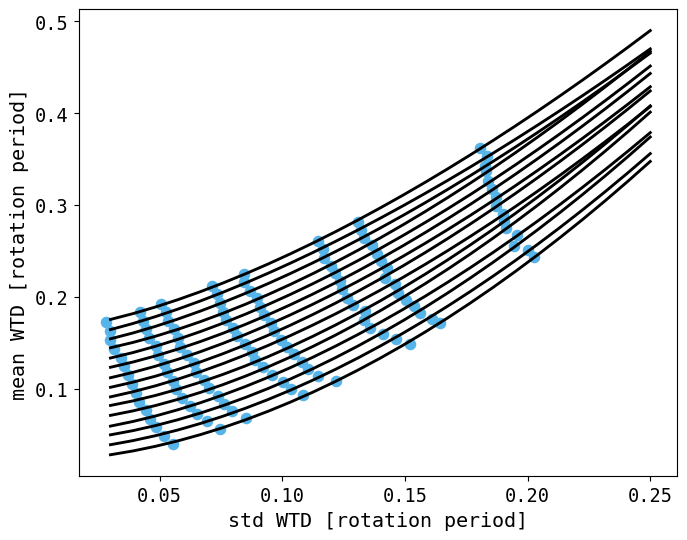

In [330]:
plt.figure(figsize=(7.5,6))
def powerlaw(x,a,b,c):
    return a*x**b +c

mono = ms[ (ms.c=='#56B4E9')]
fits = {}
i=0
for c, g in mono.groupby("c"):
    fits[c] = {}
    for lat, h in g.groupby("latitude"):
#     g["stdomean"]= g.mean_of_wtd_stds
#     g = g.sort_values("stdomean",ascending=True)
        fits[c][lat] = {}
        plt.scatter(h.mean_of_wtd_stds, h.mean_of_wtd_means+i,c=c,label=lat,s=50)
        resul = curve_fit(powerlaw, h.mean_of_wtd_stds,h.mean_of_wtd_means)[0]
        fits[c][lat]["a"] = resul[0]
        fits[c][lat]["b"] = resul[1]
        fits[c][lat]["c"] = resul[2]
        x = np.linspace(0.03,0.25,25)
        plt.plot(x, powerlaw(x, *resul)+i,c="k")
        i += 0.01
# for i, row in mono.iterrows():
#     plt.scatter(float(row.mean_of_wtd_means)/float(row.mean_of_wtd_stds), 
#                 float(row.latitude),c=row.c,s=float(row.mean_of_wtd_stds)**2*10000)
plt.xlabel("std WTD [rotation period]")
plt.ylabel("mean WTD [rotation period]")
# plt.legend()
# plt.xlim(0.04,0.2)
# plt.ylim(0.03,0.22)
# plt.xscale("log")
# plt.yscale("log")

Text(0.5, 1.0, 'single spot')

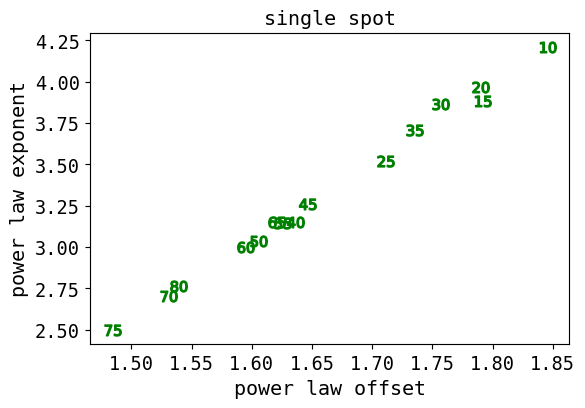

In [329]:
df = pd.DataFrame(fits['#56B4E9']).T
for i, row in df.iterrows():
    plt.scatter(row.b,row.a,alpha=1,s=150,marker=rf"${i}$",c="green")
plt.xlabel("power law offset")
plt.ylabel("power law exponent")
plt.title("single spot")


Text(0, 0.5, 'latitude [deg]')

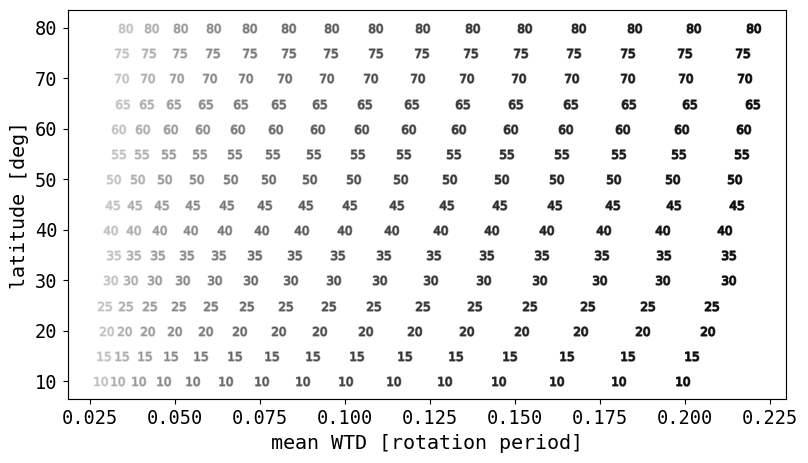

In [338]:
dd = {}
plt.figure(figsize=(9,5))
for std in np.linspace(0.03,0.18, 15):
    dd[std] = {}
    for i, row in df.iterrows():
        mean = powerlaw(std, row.a,row.b,row.c)
        plt.scatter(mean,i,alpha=std/.22,marker=fr"${i}$",c='k',s=100)
        dd[std][i]= mean
plt.xlabel("mean WTD [rotation period]")
plt.ylabel("latitude [deg]")


In [286]:
ddd = pd.DataFrame(dd).T

Text(0, 0.5, 'latitude [deg]')

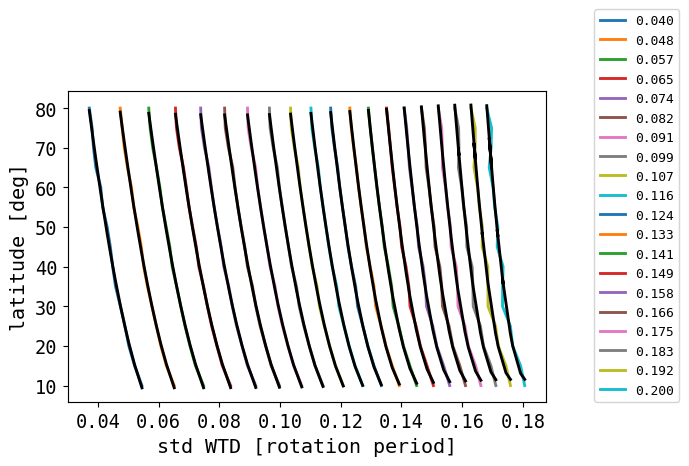

In [301]:
def linearfunc(std, slope, offs):
    "returns latitude"
    return std * slope + offs 

def quadfunc(std, quad, slope, offs):
    "returns latitude"
    return std**2 * quad + std * slope + offs 

slopeoffs  = {}
for i, row in ddd.iterrows():
    slopeoffs[i] = {}
    plt.plot(row.values, row.index, label=f"{i:.3f}")
    quad, slope, offs = curve_fit(quadfunc, row.values, row.index.values)[0]
    slopeoffs[i]["slope"] = slope
    plt.plot(row.values, quadfunc(row.values,quad, slope, offs),c="k")
    slopeoffs[i]["offs"] = offs
    slopeoffs[i]["quad"] = quad
plt.legend(loc=(1.1,0),fontsize=9)
plt.xlabel("std WTD [rotation period]")
plt.ylabel("latitude [deg]")

In [302]:
slopeoffs = pd.DataFrame(slopeoffs).T

Text(0, 0.5, 'quad of latitude-std relation')

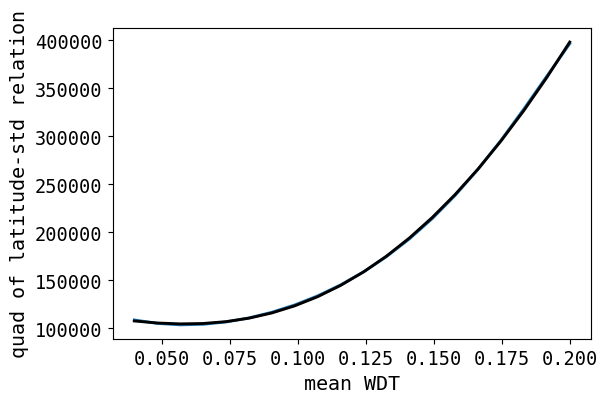

In [310]:
plt.plot(slopeoffs.index, slopeoffs["quad"])
quad_params = curve_fit(fourth_order_pol, slopeoffs.index, slopeoffs["quad"])[0]
plt.plot(slopeoffs.index,fourth_order_pol(slopeoffs.index, *quad_params), c="k")
plt.xlabel("mean WDT")
plt.ylabel("quad of latitude-std relation")

Text(0, 0.5, 'slope of latitude-std relation')

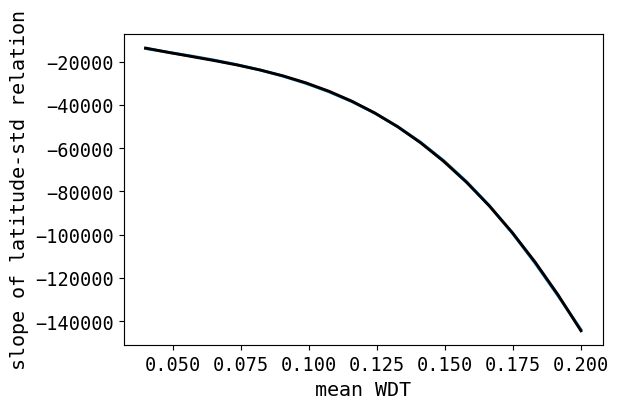

In [315]:
def fourth_order_pol(x, p1, p2, p3, p4, p5):
    return p1*x**4 + p2*x**3 + p3*x**2 + p4*x + p5

def neg_expon(x, a, b, c):
    return c - a*np.exp(x*b)
plt.plot(slopeoffs.index, slopeoffs["slope"])
slope_params = curve_fit(fourth_order_pol, slopeoffs.index, slopeoffs["slope"])[0]
plt.plot(slopeoffs.index,fourth_order_pol(slopeoffs.index, *slope_params), c="k")
plt.xlabel("mean WDT")
plt.ylabel("slope of latitude-std relation")

Text(0, 0.5, 'offset of $\\theta-\\sigma$ relation')

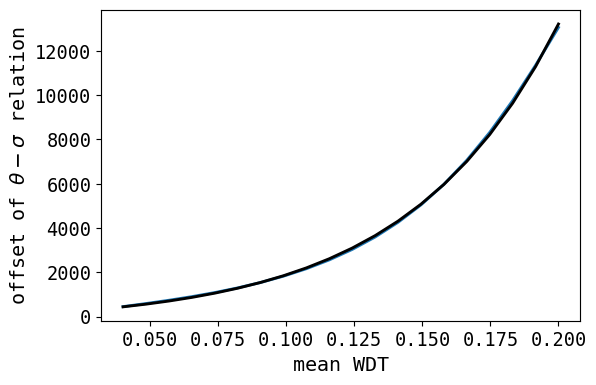

In [305]:
def second_order_pol(x, p1, p2, p3):
    return p1*x**2 + p2*x + p3
def expon(x, a, b, c):
    return c + a*np.exp(x*b)

plt.plot(slopeoffs.index, slopeoffs["offs"])
offset_params = curve_fit(expon, slopeoffs.index, slopeoffs["offs"])[0]
plt.plot(slopeoffs.index,expon(slopeoffs.index, *offset_params), c="k")
# offsets = slopeoffs["offs"].values
plt.xlabel("mean WDT")
plt.ylabel(r"offset of $\theta-\sigma$ relation")
# plt.xscale("log")
# plt.yscale("log")

In [316]:
def latitude(mean, sigma, quad_params,slope_params, offset_params):
    return (fourth_order_pol(mean, *quad_params) * sigma**2 + 
            fourth_order_pol(mean, *slope_params) * sigma + 
            expon(mean, *offset_params))

In [317]:
mono.head()

,tstamp,nspots,hem,nflares,c,latitude,mean_of_wtd_means,mean_of_wtd_stds,std_of_wtd_means,std__of_wtd_stds
360,2022_03_31_10_18_2022_03_31_09_59,1-3,mono-hem.,20-30,#56B4E9,10,0.039927,0.055386,0.001530,0.003919
361,2022_03_31_10_18_2022_03_31_09_59,1-3,mono-hem.,20-30,#56B4E9,15,0.038914,0.052018,0.001355,0.004152
362,2022_03_31_10_18_2022_03_31_09_59,1-3,mono-hem.,20-30,#56B4E9,20,0.037837,0.048553,0.001058,0.003287
363,2022_03_31_10_18_2022_03_31_09_59,1-3,mono-hem.,20-30,#56B4E9,25,0.037135,0.046139,0.000955,0.002770
364,2022_03_31_10_18_2022_03_31_09_59,1-3,mono-hem.,20-30,#56B4E9,30,0.036614,0.044421,0.001044,0.002752


(0.03, 0.19)

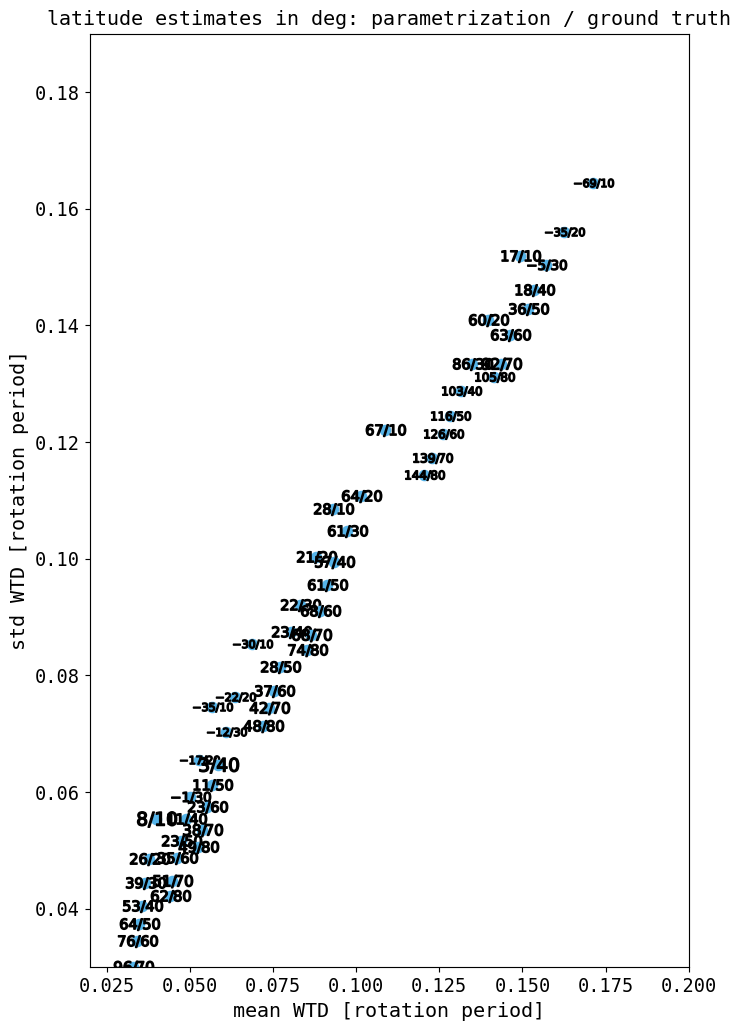

In [318]:
plt.figure(figsize=(7.5,12))

for lat, h in mono.groupby("latitude"):
    if lat%10 == 0:
        plt.scatter(h.mean_of_wtd_means,h.mean_of_wtd_stds,c=c,label=lat,s=50)
        lats = latitude(h.mean_of_wtd_means,h.mean_of_wtd_stds,quad_params,slope_params, offset_params)
        for i, l in enumerate(lats):
#                 print(l)
            plt.scatter(h.mean_of_wtd_means.iloc[i],h.mean_of_wtd_stds.iloc[i],s=800,
                        marker=fr"${l:.0f}/{lat:2d}$",c='k')
plt.xlabel("mean WTD [rotation period]")
plt.ylabel("std WTD [rotation period]")
plt.title("latitude estimates in deg: parametrization / ground truth")
# plt.legend()
plt.xlim(0.02,0.2)
plt.ylim(0.03,0.19)
# plt.xscale("log")
# plt.yscale("log")

(0.03, 0.19)

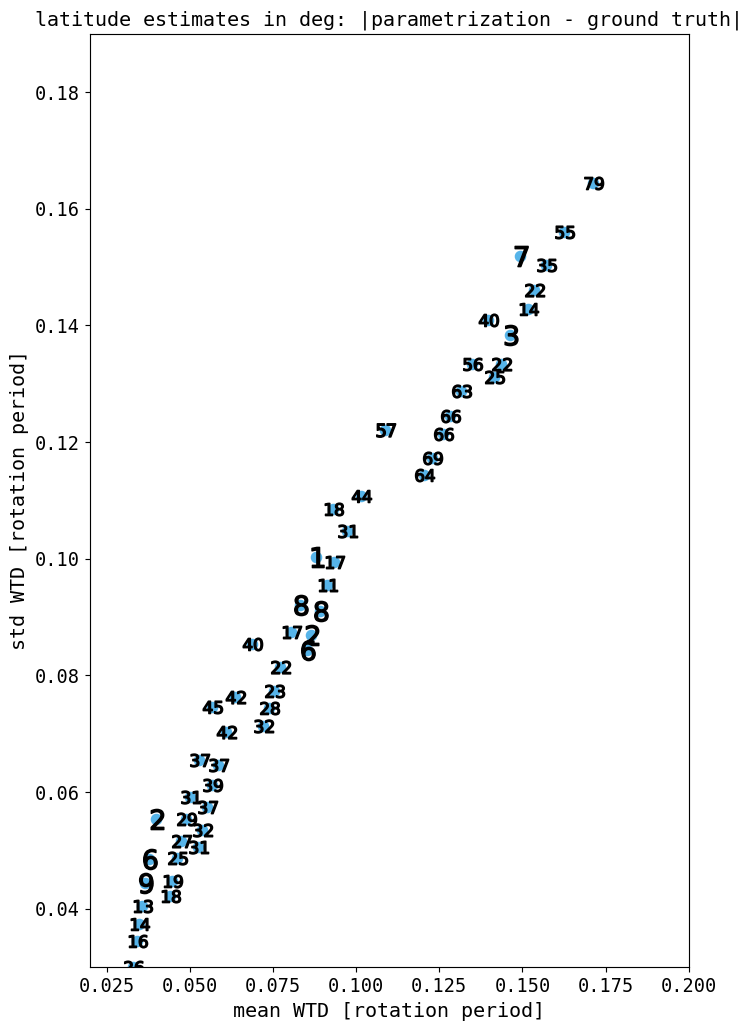

In [319]:
plt.figure(figsize=(7.5,12))


for lat, h in mono.groupby("latitude"):
    if lat%10 == 0:
        plt.scatter(h.mean_of_wtd_means,h.mean_of_wtd_stds,c=c,label=lat,s=50)
        lats = latitude(h.mean_of_wtd_means,h.mean_of_wtd_stds,quad_params,slope_params, offset_params)
        for i, l in enumerate(lats):
#                 print(l)
            plt.scatter(h.mean_of_wtd_means.iloc[i],h.mean_of_wtd_stds.iloc[i],s=200,
                        marker=fr"${abs(l-lat):.0f}$",c='k')
            dffs.append(abs(l-lat))
plt.xlabel("mean WTD [rotation period]")
plt.ylabel("std WTD [rotation period]")
plt.title("latitude estimates in deg: |parametrization - ground truth|")
# plt.legend()
plt.xlim(0.02,0.2)
plt.ylim(0.03,0.19)
# plt.xscale("log")
# plt.yscale("log")

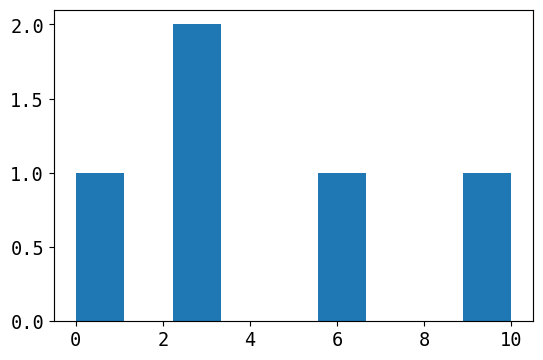

In [272]:
np.mean(dffs), np.median(dffs)
plt.hist(dffs, bins=np.linspace(0,10,10));

# The condensed version of the fit

In [181]:
def powerlaw(x,a,b):
    return a*x**b 

def linearfunc(std, slope, offs):
    "returns latitude"
    return std * slope + offs 

def fourth_order_pol(x, p1, p2, p3, p4, p5):
    return p1*x**4 + p2*x**3 + p3*x**2 + p4*x + p5

def second_order_pol(x, p1, p2, p3):
    return p1*x**2 + p2*x + p3

def latitude(mean, sigma, slope_params, offset_params):
    return fourth_order_pol(mean, *slope_params) * sigma + second_order_pol(mean, *offset_params)

# select color of the setup, i.e. hemispherity and number of spots
COLOR = '#56B4E9'#'#E69F00'

# get all simulated measurements
ms = pd.read_csv("results/2022_05_all_mean_stds.csv")

# select setup
mono = ms[ms.c==COLOR]

# extrapolate the equi-latitude lines to allow us to switch axes

fits = {}
for lat, h in mono.groupby("latitude"):
    fits[lat] = {}
    resul = curve_fit(powerlaw, h.mean_of_wtd_means,h.mean_of_wtd_stds)[0]
    fits[lat]["a"] = resul[0]
    fits[lat]["b"] = resul[1]
        
df = pd.DataFrame(fits).T

# switch axes
dd = {}
for mean in np.linspace(0.04,0.2, 20):
    dd[mean] = {}
    for i, row in df.iterrows():
        std = powerlaw(mean, row.a,row.b)
        dd[mean][i]= std

        
ddd = pd.DataFrame(dd).T

# fit linear func to latitude (sigma)

slopeoffs  = {}
for i, row in ddd.iterrows():
    slopeoffs[i] = {} 
    slope, offs = curve_fit(linearfunc, row.values, row.index.values)[0]
    slopeoffs[i]["slope"] = slope
    slopeoffs[i]["offs"] = offs
    
slopeoffs = pd.DataFrame(slopeoffs).T

# fit 2nd and 4th order polynomials to slope(mean) and offs(mean)

slope_params = curve_fit(fourth_order_pol, slopeoffs.index, slopeoffs["slope"])[0]
offset_params = curve_fit(second_order_pol, slopeoffs.index, slopeoffs["offs"])[0]


# sanity check that the fit has worked approximately by calculating the median residuals
mono["inferred_lat"] = latitude(mono.mean_of_wtd_means,mono.mean_of_wtd_stds,
                                slope_params, offset_params)

np.sqrt((mono["inferred_lat"]-mono["latitude"])**2).sum()/mono.shape[0]

/tmp/ipykernel_3005737/1986910296.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mono["inferred_lat"] = latitude(mono.mean_of_wtd_means,mono.mean_of_wtd_stds,


48.495349136345126

# Fit directly to the data

In [223]:
# def polyfit(x, a1,a2, b1,b2, b3, c):
#     mean, sigma = x
#     return a2 * mean**2 + a1 * mean + b1*sigma + c + b2 * (sigma**2)+b3*(sigma*mean)**2#*sigma

def polyfit(x, a1,a2,a3,a4,a5, b1,b2, b3):
    mean, sigma = x
    return fourth_order_pol(mean,a1,a2,a3,a4,a5) * sigma + second_order_pol(mean, b1,b2, b3)
#a3 * mean**3
#b3 * sigma**3+  
from mpl_toolkits import mplot3d

In [224]:
x = mono.mean_of_wtd_means.values
y = mono.mean_of_wtd_stds.values
z = mono.latitude.values

res = curve_fit(polyfit,(x,y),z)

res[0]

array([-1.41095655e+06,  7.63368898e+05, -1.43407846e+05,  6.06569910e+03,
       -3.98586293e+03, -3.50097907e+03,  4.83001167e+03,  3.37511679e+01])

0.43000929012005096 2.7995723646700625 3.5764019427055604 16.300482286171814


(0.0, 90.0)

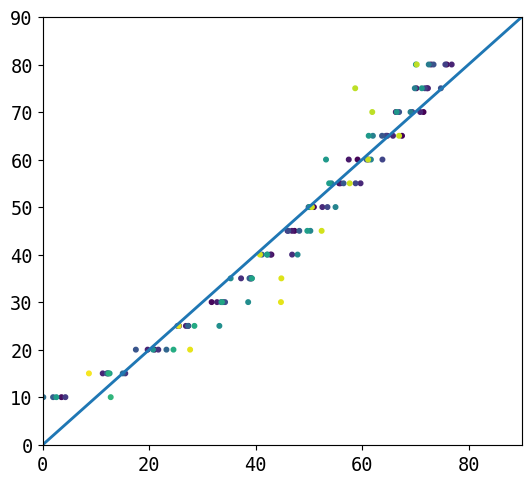

In [225]:
print(np.sqrt(np.sum((polyfit((x,y), *res[0]) - z)**2))/mono.shape[0], 
np.median(np.abs(polyfit((x,y), *res[0]) - z)),  
np.mean(np.abs(polyfit((x,y), *res[0]) - z)),
np.max(np.abs(polyfit((x,y), *res[0]) - z)))
plt.figure(figsize=(6,5.5))
plt.scatter(polyfit((x,y), *res[0]),z,s=10,c=x)
plt.plot([0,90],[0,90])
plt.xlim(0,90)
plt.ylim(0,90)

In [226]:
import matplotlib as mpl

Text(0, 0.5, 'latitude [deg]')

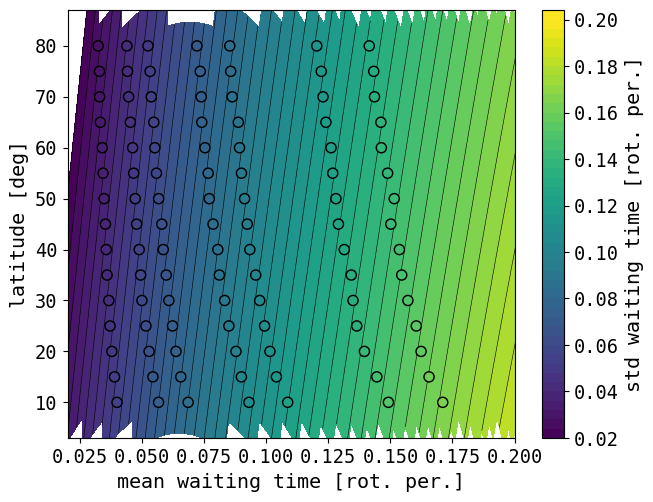

In [227]:
fig = plt.figure(figsize=(7,5.5))
x_ = np.linspace(0.02,0.25, 150)
y_ = np.linspace(0.02,0.25,150)
X, Y = np.meshgrid(x_, y_)
Z = polyfit((X,Y), *res[0])
cond = (Z>90) | (Z<0)
X[cond] = np.nan
Y[cond] = np.nan
Z[cond] = np.nan
vmin, vmax=0.02,0.2
ec = plt.contourf(X,Z,Y,levels=45,vmin=vmin, vmax=vmax,zorder=-10)

plt.xlim(0.02,0.2)
plt.ylim(3,87)

cbar = plt.colorbar(ec)
plt.contour(X,Z,Y,levels=45,colors="k",linewidths=.4,zorder=10)
plt.scatter(x,z,c=y,cmap="viridis",vmin=vmin, vmax=vmax,s=50,zorder=20,edgecolor="k")
cbar.set_label('std waiting time [rot. per.]')
plt.xlabel('mean waiting time [rot. per.]')

plt.ylabel('latitude [deg]')

/tmp/ipykernel_3005737/2281816328.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, cmap="gray_r",alpha=0.5,vmin=0, vmax=90)


Text(0.5, 0, 'latitude [deg]')

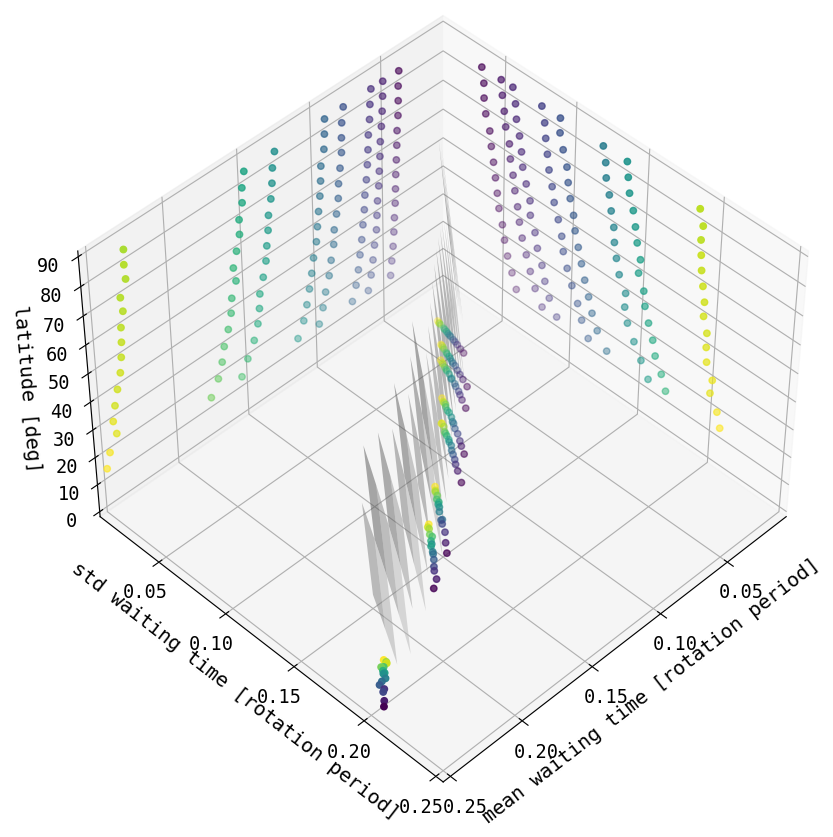

In [187]:

# %matplotlib notebook

x_ = np.linspace(np.min(x),np.max(x), 55)
y_ = np.linspace(np.min(y),np.max(y), 55)
X, Y = np.meshgrid(x_, y_)
Z = polyfit((X,Y), *res[0])

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

cond = (Z>90) | (Z<0)
X[cond] = np.nan
Y[cond] = np.nan
Z[cond] = np.nan
# print(Z.shape)
ax.plot_surface(X, Y, Z, cmap="gray_r",alpha=0.5,vmin=0, vmax=90)
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none');

# ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.scatter3D(x, y, 0, c=z, cmap="viridis")
ax.scatter3D(x, 0, z, c=y, cmap="viridis")
ax.scatter3D(0, y, z, c=x, cmap="viridis")
# ax.scatter3D(x, y, z, color="k")#, cmap='jet',vmin=0, vmax=90);
ax.view_init(45, 45);
ax.set_zlim(0,90)
ax.set_xlim(0.01,.25)
ax.set_ylim(0.01,.25)
ax.set_xlabel("mean waiting time [rotation period]")
ax.set_ylabel("std waiting time [rotation period]")
ax.set_zlabel("latitude [deg]")

# Condense even more

In [176]:


# get all simulated measurements
ms = pd.read_csv("results/2022_05_all_mean_stds.csv")

fit_res = {}

for color, mono in ms.groupby("c"):

    x = mono.mean_of_wtd_means.values
    y = mono.mean_of_wtd_stds.values
    z = mono.latitude.values

    res = curve_fit(polyfit,(x,y),z)
    
    fit_res[color] = [mono.nspots.iloc[0], mono.hem.iloc[0], *res[0]]
    


In [177]:
cols = ["nspots","hem","a1","a2","b1","b2","c"]#"b2",
fit_res_df = pd.DataFrame.from_dict(fit_res, orient="index",
                       columns=cols)
colormatch={"bi-hem.":'r',"mono-hem.":'k'}
fit_res_df["hemcol"] = fit_res_df["hem"].apply(lambda x: colormatch[x])
spotsmatch={"1":1,"1-3":2,"3-5":4}
fit_res_df["meanspots"] = fit_res_df["nspots"].apply(lambda x: spotsmatch[x])
fit_res_df

,nspots,hem,a1,a2,b1,b2,c,hemcol,meanspots
#009E73,3-5,mono-hem.,8555.914435,-14529.544838,-6864.719448,12521.640646,-28.852022,k,4
#230072B2,3-5,bi-hem.,15560.761854,-28412.547406,-11902.560685,28884.828017,-71.120972,r,4
#56B4E9,1-3,mono-hem.,4863.377698,-5650.582111,-4084.450161,-4963.264081,44.833755,k,2
#CC79A7,1-3,bi-hem.,3029.526160,2484.978882,-3248.469186,-22230.795969,85.994647,r,2
#E69F00,1,bi-hem.,1647.468545,-1935.676867,-1570.051986,449.059040,81.366951,r,1


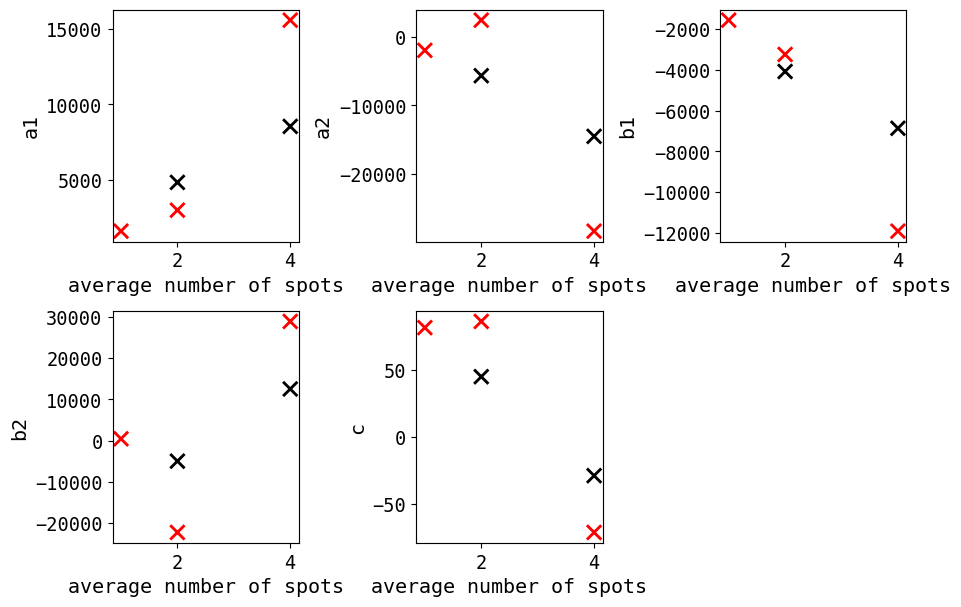

In [178]:
fig, AX = plt.subplots(ncols=3, nrows=2, figsize=(9,6))
axes = [a for _ in AX for a in _]
# print(axes,AX)
for (ax, col) in list(zip(axes[:-1],cols[2:])):
#     print(ax,col)
    ax.scatter(fit_res_df.meanspots,fit_res_df[col],c=fit_res_df.hemcol,s=100,marker = "x")
    ax.set_ylabel(col)
    ax.set_xlabel("average number of spots")
axes[-1].axis("off")
plt.tight_layout()

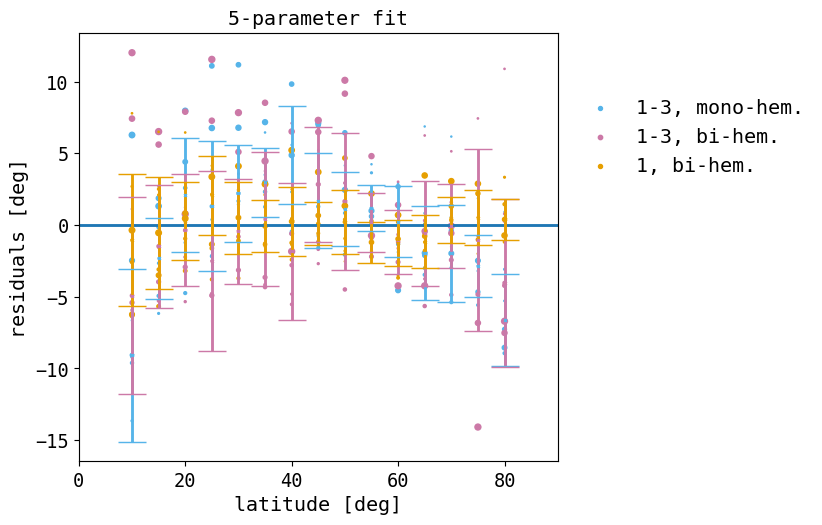

In [180]:
plt.figure(figsize=(6,5.5))
mm = ms[(ms.nspots=="1") | (ms.nspots=="1-3")]
for c, g in mm.groupby("c"):
    g = g[g["mean_of_wtd_means"]<.2]
    row = fit_res_df.loc[c]
    res = row[cols[2:]].values
    fitvals = polyfit((g["mean_of_wtd_means"],g["mean_of_wtd_stds"]), *res)
    plt.scatter(g["latitude"],fitvals-g["latitude"],
                label=f"{row.nspots}, {row.hem}",s=g["mean_of_wtd_means"]**2*500,c=c)
    for l, h in g.groupby("latitude"):
        fitvals = polyfit((h["mean_of_wtd_means"],g["mean_of_wtd_stds"]), *res)
        plt.errorbar([l],np.nanmedian(fitvals-l),yerr=np.nanstd(fitvals-l),markersize=2,
                     marker="x",c=c,zorder=10,capsize=10)
plt.plot([0,90],[0,0])
plt.xlim(0,90)
# plt.ylim(0,90)
plt.title("5-parameter fit")
plt.ylabel("residuals [deg]")
plt.xlabel("latitude [deg]")
plt.legend(frameon=False, loc=(1.03,0.65));